In [1]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import sqrt

import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features
from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.decomposition import PCA

#Visual Analysis
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import IPython

from imblearn.over_sampling import ADASYN #Adaptive Synthetic Oversampling
from collections import Counter
from scipy import stats

#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

print('Imported successfully')

Imported successfully


#DATASET ANALYSIS AND PREPROCESSING

In [2]:
#Loading data in a dataframe 'creditcard_data' and using head() to display the first 5 instances.
df_train_original = pd.read_csv('train_data.csv')
df_train_hidden = pd.read_csv('test_data_hidden.csv')
df_test = pd.read_csv('test_data.csv')
frame = [df_train_original,df_train_hidden]
creditcard_data = pd.concat(frame)
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [3]:
#Use parameter 'n' to display instances other than 5.
creditcard_data.head(n=20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0
5,37590.0,-6.341667,1.192815,-3.686579,-2.754006,-5.007164,3.988118,1.693606,-13.577522,2.557965,...,9.779321,-3.660198,-1.507217,-0.179185,0.002092,-0.019168,3.611243,-0.894494,1437.08,0
6,56739.0,-0.463928,0.204745,2.795734,1.546200,-0.720374,1.108212,-0.581133,0.544075,1.099843,...,0.094431,0.788161,-0.100344,0.126248,-0.461584,-0.200985,0.280168,0.180046,11.10,0
7,912.0,-1.394619,0.554224,-0.617805,-0.313706,2.157413,3.537534,-0.567305,1.380888,-0.112291,...,-0.196300,-0.546172,-0.124758,1.046780,-0.089474,0.363674,0.215692,0.225698,24.08,0
8,171058.0,-2.121785,-1.518485,2.667942,-2.458839,-1.414952,0.807935,-1.870160,0.516477,-0.553359,...,-0.079591,0.659885,-1.000976,-0.212991,0.420722,-0.019645,-0.482792,-0.407780,28.00,0
9,79450.0,-2.254788,-0.955967,0.590596,0.114744,-5.876531,3.364858,6.365904,-1.252960,0.243849,...,-0.601908,-0.092918,0.517855,0.534361,0.494493,0.301414,0.507071,-0.560888,1354.98,0


In [4]:
#Number of instances and attributes,i.e., Dimensionality of the dataset
creditcard_data.shape

(284807, 31)

In [5]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 56961
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284

This shows that there are 284807 instances and 31 attributes including the class attribute.

In [6]:
#Sum of missing cells for each attribute
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The 0 sum for all attributes shows that there are no missing values.

In [7]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
creditcard_data['Class'].nunique()

2

As expected, there are only 2 classes.

In [8]:
#number of instances per class
creditcard_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

This shows a complete imbalance of classes. There are 284315 'Genuine' (0) instances and only 492 'Fraudulent' (1) instances.

<AxesSubplot:>

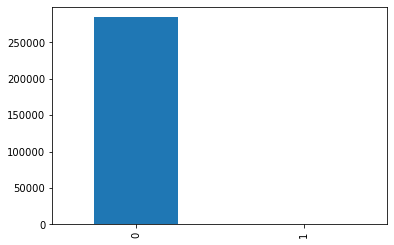

In [9]:
#visual representation of instances per class
creditcard_data.Class.value_counts().plot.bar()

This gives a visual representation of the class imbalance. The below plot after PCA gives a better visualization of the imbalnce in the datasets.

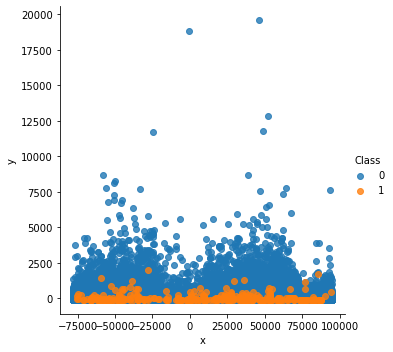

In [10]:
#Before sampling (PCA is performed for visualization only)
pca= PCA(n_components=2)
creditcard_data = creditcard_data.loc[~creditcard_data.index.duplicated(keep='first')]
#creditcard_2d = creditcard_2d.loc[~creditcard_2d.index.duplicated(keep='first')]
creditcard_2d= pd.DataFrame(pca.fit_transform(creditcard_data.iloc[:,0:30]))
creditcard_2d.reset_index(inplace=True, drop=True)
creditcard_2d= pd.concat([creditcard_2d, creditcard_data['Class']],axis=1)
#df3 = pd.concat([df1, df2], ignore_index=True).reindex(df1.columns, axis='columns')
creditcard_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=creditcard_2d, fit_reg=False, hue='Class')

In [11]:
#Descriptive Statistics
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [12]:
#checking the percentage of each class in the dataset
(creditcard_data.Class.value_counts())/(creditcard_data.Class.count())

0    0.998271
1    0.001729
Name: Class, dtype: float64

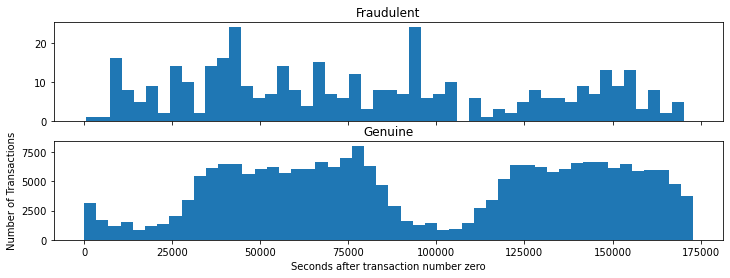

In [13]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(creditcard_data["Time"][creditcard_data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(creditcard_data["Time"][creditcard_data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

The transactions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transaction was initiated is not given. Thus, we'll drop this feature.

In [14]:
#dropping Time because it does not give any valuable information
creditcard_data = creditcard_data.drop("Time", axis = 1)
creditcard_data.shape

(227845, 30)

Now there are 30 features in the dataset.

In [15]:
#Descriptive statistics for Fraudulent Transactions
print("Fraudulent Transactions")
creditcard_data['Amount'][creditcard_data['Class']==1]. describe()

Fraudulent Transactions


count     394.000000
mean      127.306523
std       264.533907
min         0.000000
25%         1.000000
50%        11.395000
75%       106.385000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
#Descriptive statistics for Genuine Transactions
print("Genuine Transactions")
creditcard_data['Amount'][creditcard_data['Class']==0]. describe()

Genuine Transactions


count    227451.000000
mean         88.455144
std         248.066088
min           0.000000
25%           5.640000
50%          22.000000
75%          77.000000
max       19656.530000
Name: Amount, dtype: float64

Nothing much can be determined from the Amount, as most of the transactions are around 100 in both cases..

In [17]:
#Variance
creditcard_data.var()

V1            3.853479
V2            2.759513
V3            2.298580
V4            2.002396
V5            1.868892
V6            1.756528
V7            1.489336
V8            1.422408
V9            1.204213
V10           1.182153
V11           1.044288
V12           0.999162
V13           0.990919
V14           0.920784
V15           0.839076
V16           0.767017
V17           0.724578
V18           0.703393
V19           0.660341
V20           0.596811
V21           0.539031
V22           0.524963
V23           0.390831
V24           0.367250
V25           0.271804
V26           0.232627
V27           0.160229
V28           0.109683
Amount    61553.679893
Class         0.001726
dtype: float64

Amount needs to be scaled. As if a feature has a variance orders of magnitude larger than the rest of the features, then it might dominate and, make the estimator unable to learn from other features as expected.

<AxesSubplot:xlabel='Class', ylabel='Amount'>

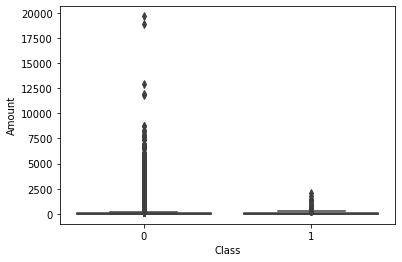

In [18]:
#Boxplot for the Amount feature, in order to visualiza the outliers.
sns.boxplot(x=creditcard_data['Class'], y=creditcard_data['Amount'])

The non-fraudulent instances are highly skewed. The outliers can be seen visually and thus, it's better to use a Robust Scaler to scale the feature 'Amount' as it is less prone to outliers.

In [19]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler=RobustScaler() #Robust to outliers
creditcard_data['Std_Amount'] = Rob_scaler.fit_transform(creditcard_data['Amount'].values.reshape(-1, 1))
creditcard_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Std_Amount
0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,...,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0,0.387101
1,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,...,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0,-0.070789
2,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,...,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0,-0.293788
3,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,...,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0,-0.156967
4,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,...,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0,0.251259


In [20]:
#drop Amount and move Std_Amount at index '0'
creditcard_data = creditcard_data.drop('Amount',axis=1)

Std_Amount = creditcard_data['Std_Amount']
creditcard_data.drop('Std_Amount', axis=1, inplace=True)
creditcard_data.insert(0, 'Std_Amount', Std_Amount)
creditcard_data.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.387101,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.084556,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,0
1,-0.070789,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.373759,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,0
2,-0.293788,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,-0.039868,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,0
3,-0.156967,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,0.382305,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,0
4,0.251259,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.106592,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,0


In [21]:
#Splitting data before sampling
#Splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split

X = creditcard_data.drop('Class', axis=1)
Y = creditcard_data['Class']

sss1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index1, test_index in sss1.split(X, Y):
    print("Train:", train_index1, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index1], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index1], Y.iloc[test_index]

#Splitting the train set further into train and validation set, which leaves train set 60% of the originial dataset and, test and validation sets 20% each respectively.
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

for train_index2, val_index in sss2.split(Xtrain, Ytrain):
    print("Train:", train_index2, "Validation:", val_index)
    Xtrain_final, Xval = X.iloc[train_index2], X.iloc[val_index]
    Ytrain_final, Yval = Y.iloc[train_index2], Y.iloc[val_index]

Train: [225122  62006 197445 ... 195660 152114 100494] Test: [197823 111280  39999 ... 161435 162193  66534]
Train: [ 94886 216390  49746 ... 212564  15633  28212] Test: [218590 111705 194736 ...   2919 166445  55972]
Train: [ 32324 180273 157039 ... 137767 192048 182984] Test: [ 74389  81651 166161 ... 119462  81618 204466]
Train: [ 43140 115026 219146 ... 219247 193629 214207] Test: [112234 227312  70293 ...  18813  45842 188749]
Train: [169044  18030 143022 ...  18169  91165 146400] Test: [223112 114673 210204 ...  40532 224979 204902]
Train: [156342  79710 176312 ...  84253   4585 115638] Validation: [161559 168932  92399 ... 164436 120425  62356]
Train: [ 32281  56644  79473 ... 106044  34049  74250] Validation: [ 79214 162190 168613 ... 155607 115380  97505]
Train: [  4921 161657 156505 ...  21832  16433 118059] Validation: [145364 164817 178563 ...  78545 128132 181294]
Train: [144345  25604  29214 ... 151088  37959 170860] Validation: [155112  31753 138773 ...  87907  80196  12

Datasets created after splitting are:
1. Train Dataset: Xtrain_final, Ytrain_final
2. Test Dataset: Xtest, Ytest
3. Validation Dataset: Xval, Yval

In [22]:
# Check if the labels are distributed equally in all the datasets after splitting
train_unique_label, train_counts_label = np.unique(Ytrain_final, return_counts=True)
test_unique_label, test_counts_label = np.unique(Ytest, return_counts=True)
val_unique_label, val_counts_label = np.unique(Yval, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Ytrain_final))
print(test_counts_label/ len(Ytest))
print(val_counts_label/ len(Yval))

Label Distributions: 

[0.99839803 0.00160197]
[0.99826637 0.00173363]
[0.99817859 0.00182141]


As seen above, the labels are almost equally distributed in all the three datasets

In [23]:
#Dimensionality of the datasets retrieved after splitting
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)

(136707, 29)
(136707,)
(45569, 29)
(45569,)
(45569, 29)
(45569,)


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

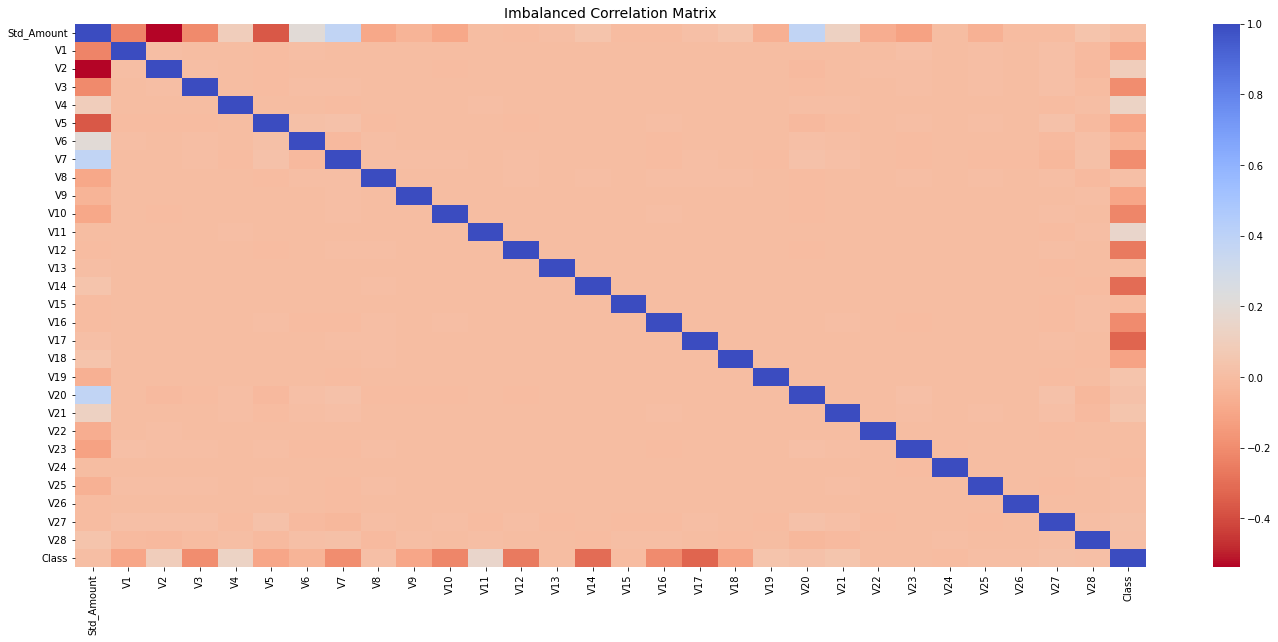

In [24]:
#checking correlation between features and the likelihood of the transaction to be fraud on the unbalanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = creditcard_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

As seen, the correlations cannot be properly visualized because of the imbalance in the dataset. This is because the correlation matrix is affected by the high imbalance betwen the classes. So, lets balance our classes and then visualize the correlation matrix again.

In [25]:
#Checking number of instances for each class in the train dataset
print(Ytrain_final.value_counts())

0    136488
1       219
Name: Class, dtype: int64


In [26]:
#Using ADASYN for Oversampling
ada = ADASYN(sampling_strategy='minority', random_state=42)

#Oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_resample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({0: 136488, 1: 136484})
Shape of X_adasampled: (272972, 29)
Shape of Y_adasampled: (272972,)


In [27]:
#check the disribution of both the labels
train_label, train_count = np.unique(Y_adasampled, return_counts=True)
print('Label Distributions: \n')
print(train_count/ len(Y_adasampled))

Label Distributions: 

[0.50000733 0.49999267]


In [28]:
print(type(X_adasampled))
print(type(Y_adasampled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


 X_adasampled and Y_adasampled are the balanced train sets resulted after using OverSampling. These are ndarrays.
In order to visualize a correlation matrix, they are converted to a dataframe and joined to form a single dataframe in the below series of blocks.

In [29]:
Xsm_train_df = pd.DataFrame(X_adasampled)
Xsm_train_df.columns = Xtrain.columns
Ysm_train_df = pd.DataFrame(Y_adasampled)
Ysm_train_df = Ysm_train_df.rename(columns={0: 'Class'})
print(Xsm_train_df.head())
print(Ysm_train_df.head())

   Std_Amount        V1        V2        V3        V4        V5        V6  \
0    0.391718  1.391704 -0.956324  0.375764 -1.307847 -1.360502 -0.888878   
1   -0.028120 -0.024058  0.906787 -0.512677 -0.332816  1.178407 -0.906475   
2   -0.277700 -6.832324  5.473283 -2.486706 -2.259795 -2.801785 -1.182182   
3    1.902630  0.987080 -1.034487  0.639821  0.534649 -1.275574  0.135043   
4   -0.223839  2.285305 -1.559815 -0.764643 -1.660166 -1.467828 -0.370045   

         V7        V8        V9  ...       V19       V20       V21       V22  \
0 -0.674548 -0.202343 -2.119004  ... -0.469560 -0.292669 -0.573400 -1.392248   
1  1.059598 -0.243177 -0.164214  ...  0.104782 -0.025478  0.310699  0.979393   
2 -1.797054  2.917665  2.518916  ... -0.802293  1.646940 -0.485352 -0.543050   
3 -0.726047  0.156434 -0.526831  ... -0.741060 -0.290064 -0.135269 -0.174666   
4 -1.484208  0.057005 -0.993251  ...  0.263038 -0.543816 -0.149236  0.009356   

        V23       V24       V25       V26       V27     

In [30]:
#Merging the Xsm_train_df and Ysm_train_df based on the index values to get a single dataframe in order to visualize a correlation matrix
new_df= pd.merge(Xsm_train_df, Ysm_train_df, how='inner', left_index=True, right_index=True)
new_df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.391718,1.391704,-0.956324,0.375764,-1.307847,-1.360502,-0.888878,-0.674548,-0.202343,-2.119004,...,-0.292669,-0.573400,-1.392248,0.328020,0.324591,-0.037594,-0.636792,0.028716,0.031302,0
1,-0.028120,-0.024058,0.906787,-0.512677,-0.332816,1.178407,-0.906475,1.059598,-0.243177,-0.164214,...,-0.025478,0.310699,0.979393,-0.277950,-0.778441,-0.401227,-0.114718,0.224558,0.239336,0
2,-0.277700,-6.832324,5.473283,-2.486706,-2.259795,-2.801785,-1.182182,-1.797054,2.917665,2.518916,...,1.646940,-0.485352,-0.543050,0.360650,-0.079759,0.565807,0.653848,-0.088113,-0.713919,0
3,1.902630,0.987080,-1.034487,0.639821,0.534649,-1.275574,0.135043,-0.726047,0.156434,-0.526831,...,-0.290064,-0.135269,-0.174666,-0.223013,-0.027926,0.446064,-0.231998,0.038214,0.044343,0
4,-0.223839,2.285305,-1.559815,-0.764643,-1.660166,-1.467828,-0.370045,-1.484208,0.057005,-0.993251,...,-0.543816,-0.149236,0.009356,0.218322,-0.560877,-0.305969,-0.159287,0.012659,-0.064798,0


Hence, the data frames Xsm_train_df and Ysm_train_df are merged to form a new dataframe 'new_df', with 30 attributes in total comprising of 'Std_Amount', 'V1-V28' from Xsm_train_df and 'Class' from Ysm_train_df.

Text(0.5, 1.0, 'Balanced Correlation Matrix')

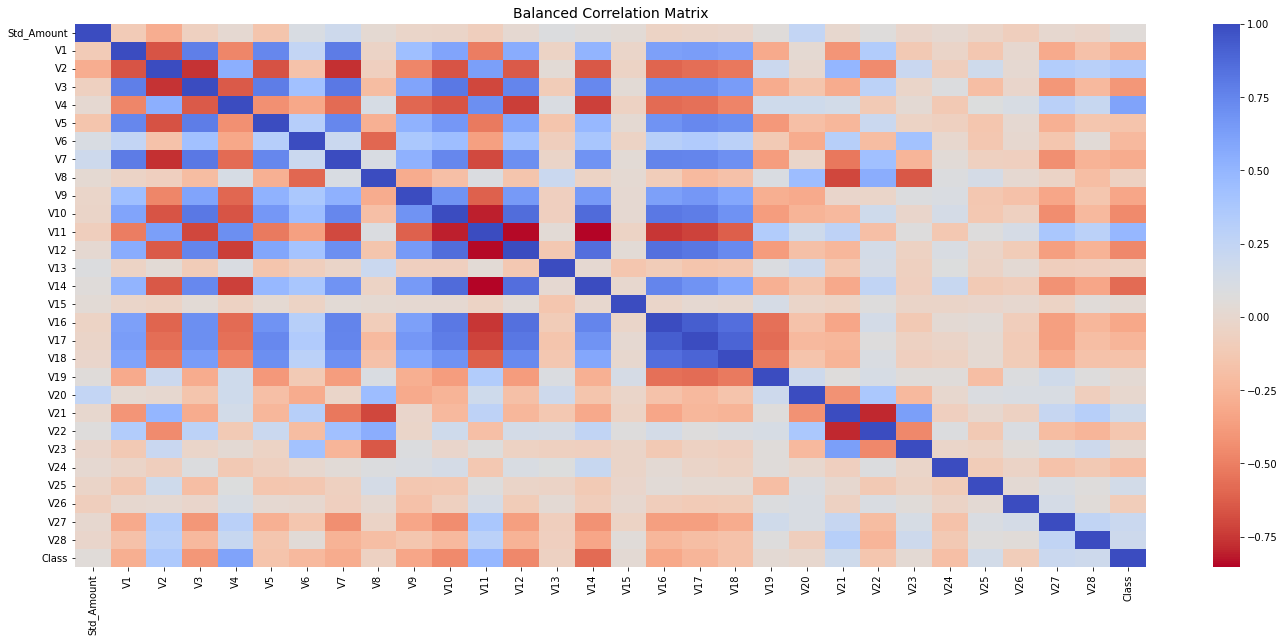

In [31]:
#checking correlation between features on the balanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Balanced Correlation Matrix", fontsize=14)

Negative and Positive Correlations can be seen in the matrix above:
* Features, V14, V12, V10 and V3 show negative correlation towards the 'Class', As, lower are these values, more likely the transaction is Fraud.
* Features V4, V11, V2 and V19 show positive correlation. As, higher are these values, more likely the transaction is Fraud.


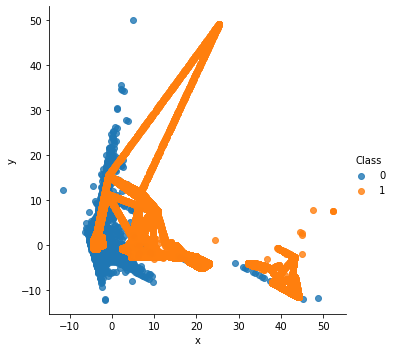

In [32]:
#visualizing balanced train dataset
X_df= pd.DataFrame(X_adasampled)
Y_df= pd.DataFrame(Y_adasampled)
Y_df=Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=train_2d, fit_reg=False, hue='Class')

The above plot gives a visual representation of the balanced dataset. As seen, the data is not linearly separable. Hence, a Multi-Layer Perceptron is trained on this data, in order to predict the data as 'fraud' or 'genuine'.
For the training of the Multi-layer perceptron, many parameters need to be tuned, thus a Grid-Search is used for this purpose. The Grid-Search is performed on the subset of the data, as it takes a lot of time to run. The following blocks create a subset of the dataset using random undersampling used only for this purpose.

In [33]:
#An undersampled dataset is created to tune the parameters using Grid-Search
Ytrain_df = pd.DataFrame(Ytrain_final)
Ytrain_df = Ytrain_df.rename(columns={0: 'Class'})
Train_set= pd.merge(Xtrain_final, Ytrain_df, how='inner', left_index=True, right_index=True)
Train_set.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
92867,0.391718,1.391704,-0.956324,0.375764,-1.307847,-1.360502,-0.888878,-0.674548,-0.202343,-2.119004,...,-0.292669,-0.573400,-1.392248,0.328020,0.324591,-0.037594,-0.636792,0.028716,0.031302,0
128235,-0.028120,-0.024058,0.906787,-0.512677,-0.332816,1.178407,-0.906475,1.059598,-0.243177,-0.164214,...,-0.025478,0.310699,0.979393,-0.277950,-0.778441,-0.401227,-0.114718,0.224558,0.239336,0
125273,-0.277700,-6.832324,5.473283,-2.486706,-2.259795,-2.801785,-1.182182,-1.797054,2.917665,2.518916,...,1.646940,-0.485352,-0.543050,0.360650,-0.079759,0.565807,0.653848,-0.088113,-0.713919,0
130830,1.902630,0.987080,-1.034487,0.639821,0.534649,-1.275574,0.135043,-0.726047,0.156434,-0.526831,...,-0.290064,-0.135269,-0.174666,-0.223013,-0.027926,0.446064,-0.231998,0.038214,0.044343,0
140445,-0.223839,2.285305,-1.559815,-0.764643,-1.660166,-1.467828,-0.370045,-1.484208,0.057005,-0.993251,...,-0.543816,-0.149236,0.009356,0.218322,-0.560877,-0.305969,-0.159287,0.012659,-0.064798,0


In [34]:
Train_set.shape

(136707, 30)

In [35]:
#Length of Frauds
length_frauds=len(Train_set[Train_set.Class==1])
length_frauds

219

In [36]:
#Taking only Frauds in a dataframe
fraud_df= Train_set.loc[Train_set['Class'] == 1]
fraud_df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
98870,1.091074,-7.222731,6.155773,-10.826460,4.180779,-6.123555,-3.114136,-6.895112,5.161516,-2.516477,...,0.818859,0.912700,-0.630358,0.190887,-0.061263,0.379775,-0.266845,1.193695,0.257468,1
97681,0.222860,-11.320633,7.191950,-13.179083,9.099552,-10.094749,-2.440115,-14.184337,4.452503,-6.241960,...,-0.180935,1.082235,-0.350563,0.483044,0.661133,-0.396522,-0.413315,-0.997548,-0.235036,1
15047,-0.041690,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,1
173381,-0.233632,-5.932778,4.571743,-9.427247,6.577056,-6.115218,-3.661798,-10.894079,3.709210,-5.859524,...,1.191078,2.014272,-0.167417,0.049968,0.384430,-0.077884,0.565493,1.792012,0.371007,1
70339,2.329603,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,-0.810146,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,1


In [37]:
#Taking only Non-frauds
non_fraud_df= Train_set.loc[Train_set['Class'] == 0]
#Randomly select the same number of records as the Frauds
non_frauds=non_fraud_df.sample(n=length_frauds)
non_frauds.shape

(219, 30)

In [38]:
#Appending both Frauds and Non-Frauds
undersampled_df= fraud_df.append(non_frauds)
#Randomly shuffling all the instances
undersampled_df = sklearn.utils.shuffle(undersampled_df)
undersampled_df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
173233,4.718523,-1.781954,2.062680,-3.758871,-1.801001,-0.084365,1.919610,-1.454364,-9.825473,-2.073119,...,-0.690810,1.234747,0.376804,-0.339706,-0.216688,-1.555393,0.655873,0.777662,0.272753,0
3480,1.580862,-2.380054,-1.408306,1.589826,-2.451413,-0.995952,-0.404218,-0.151184,-0.154366,-1.443514,...,-0.080656,-0.314740,0.229681,-0.277078,-0.023355,0.512792,-0.241501,-0.205021,-0.259823,0
15789,-0.069110,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,...,0.327490,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,1
15047,-0.041690,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,1
156630,-0.286514,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.165249,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1


In [39]:
#Separating labels from the other features
X_undersample = undersampled_df.drop('Class', axis=1)
Y_undersample = undersampled_df['Class']
print(X_undersample.shape)
print(Y_undersample.shape)
X_undersample.head()

(438, 29)
(438,)


,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
173233,4.718523,-1.781954,2.062680,-3.758871,-1.801001,-0.084365,1.919610,-1.454364,-9.825473,-2.073119,...,-0.740407,-0.690810,1.234747,0.376804,-0.339706,-0.216688,-1.555393,0.655873,0.777662,0.272753
3480,1.580862,-2.380054,-1.408306,1.589826,-2.451413,-0.995952,-0.404218,-0.151184,-0.154366,-1.443514,...,-0.553938,-0.080656,-0.314740,0.229681,-0.277078,-0.023355,0.512792,-0.241501,-0.205021,-0.259823
15789,-0.069110,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,...,1.717095,0.327490,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820
15047,-0.041690,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,0.432054,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195
156630,-0.286514,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.655270,-0.165249,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559


In [40]:
#Converting undersampled train sets in numpy arrays
X_us_arr= X_undersample.values
Y_us_arr= Y_undersample.values

In [41]:
#Converting test and validation dataframes in numpy arrays
Xval_arr=Xval.values
Yval_arr=Yval.values
Xtest_arr=Xtest.values
Ytest_arr=Ytest.values

The code in the following block is used for hyperparameter tuning of different parameters required for the training of a multilayer perceptron. It is commented as it takes alot of time to run. It is run on the undersampled dataset created above. Moreover, the biggest challenge is reproducability. Even after using the seed, the outputs produced vary a bit. But after multiple runs, the parameters that were returned were:
neuron_1=65, 
dropout_rate=0.5, 
init_mode='he_normal', 
learn_rate=0.001

In [42]:
# #Grid Search for hyperparameter tuning
# def create_model(neuron_1=29, dropout_rate=0.0, init_mode='uniform', learn_rate=0.01):
#     n_inputs = X_undersample.shape[1]
#     model = Sequential()
#     model.add(Dense(neuron_1, input_shape=(n_inputs, ), kernel_initializer=init_mode, activation= 'relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
#     model.compile(Adam(lr=learn_rate), loss='binary_crossentropy')
#     return model
# #Keras models can be used with scikit learn by wrapping them with KerasClassifier
# model_tuning = KerasClassifier(build_fn=create_model,epochs=30, batch_size=700, verbose=1)

# neuron_1= [29, 30, 35, 40, 45, 50,55,60,65,70]
# learn_rate= [0.001, 0.01, 0.1, 0.2, 0.3]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# param_grid = dict(neuron_1=neuron_1, dropout_rate=dropout_rate, init_mode=init_mode, learn_rate=learn_rate)
# grid = GridSearchCV(estimator=model_tuning, param_grid=param_grid, scoring=make_scorer(f1_score), cv=5, n_jobs=-1)
# grid_result = grid.fit(X_us_arr, Y_us_arr)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# mean_score = grid_result.cv_results_['mean_test_score']
# std_score = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(mean_score, std_score, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


#EXPERIMENTAL DESIGN

Hypothesis: A neural network�s performance on the Credit-Card Fraud dataset is affected by the number of hidden layers.
* Null Hypothesis (H0): Insufficient evidence to support hypothesis
* Alternate Hypothesis (H1): Evidence suggests the hypothesis is likely true.

In this notebook, 2 models are trained:
1. Multi-layer Perceptron with 1 hidden layer and,
2. Multi-layer Perceptron with 2 hidden layers
1. Rest all parameters are kept the same in both the models.

Since, Neural Networks are stochastic and output different results for each run with the same data. The model will be run for a specific number of iterations so that the average score of all the repetitions can determine the skill of the model. Thus, now this sample size sufficiency needs to be determined. For this purpose the multi layer perceptron  model is trained for 100 (selected randomly) iterations and F-score is returned for all the repetitions.

The iterations below were run to determine the sufficient sample size required. The output returned is:
f_scorelist1= [0.7627118644067796, 0.749003984063745, 0.7419354838709676, 0.7457627118644068, 0.7018867924528301, 0.7294117647058823, 0.6643109540636042, 0.753968253968254, 0.7018867924528301, 0.6888888888888889, 0.6478873239436619, 0.7430830039525692, 0.7410358565737051, 0.7479674796747967, 0.7175572519083968, 0.7634854771784232, 0.7265625, 0.6690647482014389, 0.7159533073929961, 0.7258064516129031, 0.7540983606557377, 0.7315175097276265, 0.7045454545454546, 0.7580645161290323, 0.7076923076923076, 0.6816479400749064, 0.7407407407407407, 0.7041198501872659, 0.7209302325581397, 0.7171314741035857, 0.6789667896678966, 0.7272727272727273, 0.732283464566929, 0.7583333333333334, 0.73015873015873, 0.7230769230769232, 0.7531380753138075, 0.7459016393442623, 0.6893939393939396, 0.7622950819672131, 0.7295081967213115, 0.7450980392156862, 0.7782426778242677, 0.6992481203007519, 0.748971193415638, 0.7126436781609196, 0.7364341085271319, 0.6842105263157894, 0.7317073170731707, 0.7848101265822784, 0.7104247104247104, 0.6666666666666666, 0.7591836734693878, 0.7401574803149606, 0.6946564885496183, 0.7272727272727273, 0.7175572519083968, 0.6946564885496183, 0.6940298507462687, 0.7109375, 0.6966292134831462, 0.7510204081632654, 0.7603305785123966, 0.6713780918727914, 0.7460317460317459, 0.7398373983739839, 0.7449392712550608, 0.673913043478261, 0.6881720430107526, 0.7551867219917012, 0.7215686274509804, 0.6789667896678966, 0.6966292134831462, 0.7551867219917012, 0.7666666666666667, 0.7215686274509804, 0.732283464566929, 0.732283464566929, 0.7181467181467182, 0.7250996015936256, 0.6791044776119403, 0.7109375, 0.7203065134099617, 0.7410358565737051, 0.7603305785123966, 0.681159420289855, 0.7551867219917012, 0.7368421052631579, 0.7142857142857143, 0.6416382252559727, 0.7294117647058823, 0.7531380753138075, 0.7698744769874477, 0.7131782945736435, 0.775, 0.5987261146496816, 0.7099236641221374, 0.7265625, 0.7372549019607844, 0.7280000000000001]

* The following code is commented as it was run for 100 iterations to determine the sufficient sample size, and it takes alot of time to run. The results are shown above and plotted in the following blocks.

In [43]:
# f_scorelist1=[]

# n_inputs = X_adasampled.shape[1]
# es= keras.callbacks.EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=2,
#                               verbose=0, mode='min', restore_best_weights= True)
# for i in range(0,100):
#     First_Model = Sequential()
#     First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
#     First_Model.add(Dropout(0.5))
#     First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#     First_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
#     First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
#     Y_first_pred = First_Model.predict_classes(Xtest_arr, batch_size=200, verbose=0)
    
#     f_score= f1_score(Ytest_arr,Y_first_pred)
#     f_scorelist1.append(f_score)

# print(f_scorelist1)
# print('FScore Mean: '+ str(np.mean(f_scorelist1)))

Now, the number of iterations are plotted against the average score from those iterations to determine the number of iterations at which the mean of the F-score gets stabilized.
These number of iterations will be considered as the sample size sufficiency, for which our model will be iterated.

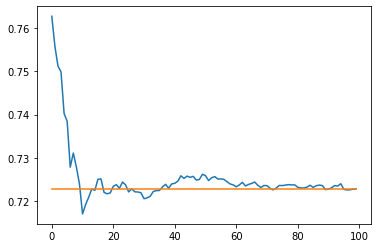

In [44]:
#Plotting number of repeats against the average score from those repeats.
#Expected: As the number of repeats increase, the average score stabilizes
f_score_list=[0.7627118644067796, 0.749003984063745, 0.7419354838709676, 0.7457627118644068, 0.7018867924528301, 0.7294117647058823, 0.6643109540636042, 0.753968253968254, 0.7018867924528301, 0.6888888888888889, 0.6478873239436619, 0.7430830039525692, 0.7410358565737051, 0.7479674796747967, 0.7175572519083968, 0.7634854771784232, 0.7265625, 0.6690647482014389, 0.7159533073929961, 0.7258064516129031, 0.7540983606557377, 0.7315175097276265, 0.7045454545454546, 0.7580645161290323, 0.7076923076923076, 0.6816479400749064, 0.7407407407407407, 0.7041198501872659, 0.7209302325581397, 0.7171314741035857, 0.6789667896678966, 0.7272727272727273, 0.732283464566929, 0.7583333333333334, 0.73015873015873, 0.7230769230769232, 0.7531380753138075, 0.7459016393442623, 0.6893939393939396, 0.7622950819672131, 0.7295081967213115, 0.7450980392156862, 0.7782426778242677, 0.6992481203007519, 0.748971193415638, 0.7126436781609196, 0.7364341085271319, 0.6842105263157894, 0.7317073170731707, 0.7848101265822784, 0.7104247104247104, 0.6666666666666666, 0.7591836734693878, 0.7401574803149606, 0.6946564885496183, 0.7272727272727273, 0.7175572519083968, 0.6946564885496183, 0.6940298507462687, 0.7109375, 0.6966292134831462, 0.7510204081632654, 0.7603305785123966, 0.6713780918727914, 0.7460317460317459, 0.7398373983739839, 0.7449392712550608, 0.673913043478261, 0.6881720430107526, 0.7551867219917012, 0.7215686274509804, 0.6789667896678966, 0.6966292134831462, 0.7551867219917012, 0.7666666666666667, 0.7215686274509804, 0.732283464566929, 0.732283464566929, 0.7181467181467182, 0.7250996015936256, 0.6791044776119403, 0.7109375, 0.7203065134099617, 0.7410358565737051, 0.7603305785123966, 0.681159420289855, 0.7551867219917012, 0.7368421052631579, 0.7142857142857143, 0.6416382252559727, 0.7294117647058823, 0.7531380753138075, 0.7698744769874477, 0.7131782945736435, 0.775, 0.5987261146496816, 0.7099236641221374, 0.7265625, 0.7372549019607844, 0.7280000000000001]
f_df=pd.DataFrame(f_score_list)
fscores= f_df.values
final_mean= np.mean(fscores[0:101])
means = list()
for i in range(1,len(f_score_list)+1):
    data = fscores[0:i, 0]
    mean_fscore = np.mean(data)
    means.append(mean_fscore)
# line plot of the values generated in the list
plt.plot(means)
plt.plot([final_mean for x in range(len(means))])
plt.show() #From this plot the point of diminishing returns can be located.

As seen in the plot above, the average of F-score is getting stabilized after 60 iterations. Thus, the sample size sufficiency is taken as 60, which means that the model will be trained for 60 repetitions and the overall average of the score from these iterations will determine the skill of the model.

#IMPLEMENTATION

In [45]:
#function for confusion matrix
def conf_matrix(predicted_values):
    Predictions_CM = confusion_matrix(Ytest_arr, predicted_values, labels = [0, 1])
    class_feat=creditcard_data['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [46]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
Model1 = Sequential()
Model1.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model
Model1.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

#Fit Model
history1= Model1.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(history1.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                1950      
                                                                 
 dense_1 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,016
Trainable params: 2,016
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
390/390 - 3s - loss: 0.0398 - accuracy: 0.9890 - val_loss: 0.0152 - val_accuracy: 0.9964 - 3s/epoch - 8ms/step
Epoch 2/30
390/390 - 1s - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.0174 - val_accuracy: 0.9964 - 1s/epoch - 4ms/step
Epoch 3/30
390/390 - 1s - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0144 - val_accuracy: 0.9982 - 1s/epoch - 4ms/step
Epoch 4/30
390/390 - 1s - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0203 - val_a

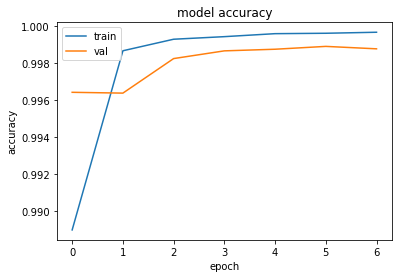

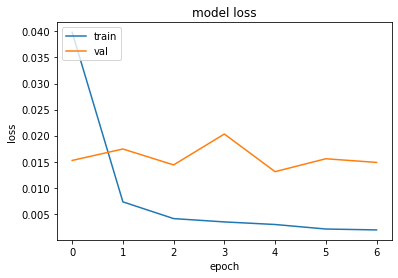

In [47]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The variation in the performance of the train and validation data shows that it has been overlearned on the train dataset. So, let's try adding Dropout and see it's effect on the performance of the model.

In [48]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model1_drop.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

history2= Model1_drop.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(history2.history.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 65)                1950      
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,016
Trainable params: 2,016
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
390/390 - 3s - loss: 0.2996 - accuracy: 0.8754 - val_loss: 0.1065 - val_accuracy: 0.9671 - 3s/epoch - 8ms/step
Epoch 2/40
390/390 - 2s - loss: 0.1056 - accuracy: 0.9732 - val_loss: 0.0645 - val_accuracy: 0.9772 - 2s/epoch - 5ms/step
Epoch 3/40
390/390 - 2s - loss: 0.0690 - accuracy: 0.9845 - val_loss: 0.

In [49]:
# #get the model
# plot_model(Model1_drop, to_file='Model1_drop.png', show_shapes=True)
# IPython.display.Image('Model1_drop.png')

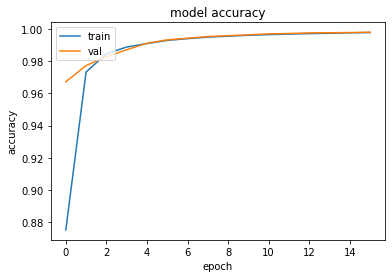

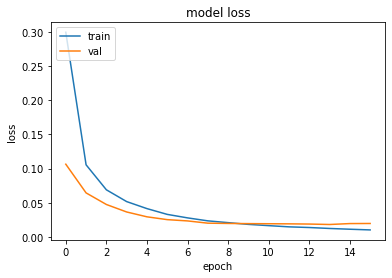

In [50]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

As observed, with the addition of Dropout, the validation dataset performs better. And the train and vaidation set performance is comparable.

1425/1425 [==============================] - 3s 2ms/step - loss: 0.0099 - accuracy: 0.9978
Accuracy Model1 (Dropout): 0.997761607170105
Recall_score: 0.8860759493670886
Precision_score: 0.4294478527607362
F-score: 0.5785123966942148


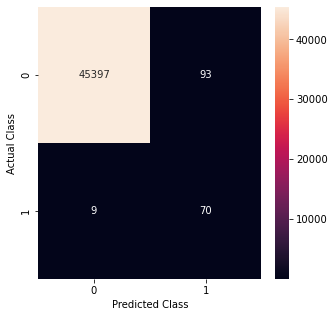

In [51]:
Y_pred_cls = Model1_drop.predict(Xtest_arr)
#classes_x=np.argmax(Y_pred_cls,axis=1)

print('Accuracy Model1 (Dropout): '+ str(Model1_drop.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred_cls >0.5)))
print('Precision_score: ' + str(precision_score(Ytest_arr,Y_pred_cls >0.5 )))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred_cls >0.5)))
conf_matrix(Y_pred_cls >0.5)

1425/1425 [==============================] - 3s 2ms/step


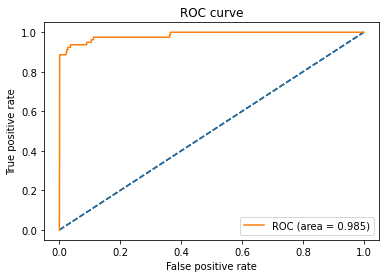

In [52]:
#Plotting ROC curve
Y_pred_prob = Model1_drop.predict(Xtest_arr).ravel()

fpr_model1, tpr_model1, thresholds_model1 = roc_curve(Ytest_arr, Y_pred_prob, pos_label=1)
auc_model1 = roc_auc_score(Ytest_arr, Y_pred_prob)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC (area = {:.3f})'.format(auc_model1))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

ROC curves are generally not well suited for imbalanced datasets, as they make use of TN. Thus, they can be deceptive. In contrast, TN are not considered in the PR-curve. Hence, they are more suitable for an imbalanced classification.

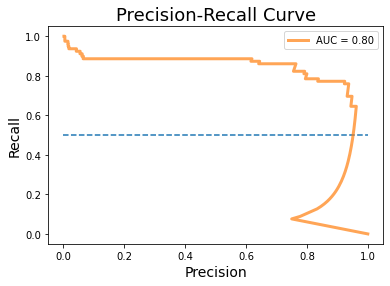

In [53]:
#Calculating Precision and Recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(Ytest_arr, Y_pred_prob)

#Auc for PR curve
AUC_PRcurve= auc(recall, precision)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [57]:
#Training Multi-layer Perceptron with single hidden layer for 60 iterations and, appending the F-score for each iteration.
f_scorelist1=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):
    First_Model = Sequential()
    First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    First_Model.add(Dropout(0.5))
    First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    First_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_first_pred = First_Model.predict(Xtest_arr, batch_size=200, verbose=0)
    
    f_score= f1_score(Ytest_arr,Y_first_pred >0.5)
    f_scorelist1.append(f_score)

print(f_scorelist1)
print('FScore Mean: '+ str(np.mean(f_scorelist1)))
print('-'*88)

[0.4697986577181208, 0.5555555555555556, 0.5343511450381679, 0.46511627906976744, 0.5882352941176471, 0.590717299578059, 0.5843621399176954, 0.5204460966542751, 0.5, 0.5390625, 0.5283018867924528, 0.5338345864661654, 0.5283018867924528, 0.5185185185185185, 0.5147058823529412, 0.5405405405405406, 0.5149253731343283, 0.509090909090909, 0.5035971223021583, 0.590717299578059, 0.5109489051094891, 0.4827586206896552, 0.49822064056939497, 0.5702811244979921, 0.4778156996587031, 0.546875, 0.5568627450980391, 0.5772357723577236, 0.546875, 0.5263157894736842, 0.5857740585774058, 0.606060606060606, 0.6167400881057269, 0.425531914893617, 0.5328185328185329, 0.6831683168316832, 0.48951048951048953, 0.6363636363636364, 0.5577689243027889, 0.5318352059925094, 0.5533596837944664, 0.5109489051094891, 0.5204460966542751, 0.5303030303030303, 0.563265306122449, 0.45751633986928103, 0.5668016194331984, 0.5702479338842975, 0.43343653250773995, 0.5243445692883895, 0.532319391634981, 0.45016077170418, 0.46357

In [58]:
#Training Multi-layer perceptron with 2 hidden layers
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
Model2.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(his_mod2.history.keys())

Epoch 1/40
390/390 - 3s - loss: 0.3400 - accuracy: 0.8707 - val_loss: 0.0946 - val_accuracy: 0.9633 - 3s/epoch - 8ms/step
Epoch 2/40
390/390 - 2s - loss: 0.1066 - accuracy: 0.9695 - val_loss: 0.0463 - val_accuracy: 0.9833 - 2s/epoch - 6ms/step
Epoch 3/40
390/390 - 2s - loss: 0.0590 - accuracy: 0.9860 - val_loss: 0.0318 - val_accuracy: 0.9906 - 2s/epoch - 5ms/step
Epoch 4/40
390/390 - 2s - loss: 0.0371 - accuracy: 0.9919 - val_loss: 0.0253 - val_accuracy: 0.9949 - 2s/epoch - 5ms/step
Epoch 5/40
390/390 - 2s - loss: 0.0261 - accuracy: 0.9946 - val_loss: 0.0237 - val_accuracy: 0.9967 - 2s/epoch - 5ms/step
Epoch 6/40
390/390 - 2s - loss: 0.0195 - accuracy: 0.9961 - val_loss: 0.0240 - val_accuracy: 0.9977 - 2s/epoch - 5ms/step
Epoch 7/40
390/390 - 2s - loss: 0.0146 - accuracy: 0.9972 - val_loss: 0.0286 - val_accuracy: 0.9978 - 2s/epoch - 5ms/step
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


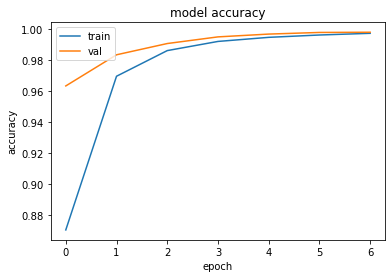

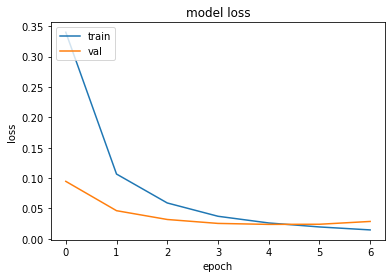

In [60]:
# summarize history for accuracy
plt.plot(his_mod2.history['accuracy'])
plt.plot(his_mod2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(his_mod2.history['loss'])
plt.plot(his_mod2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# #Plotting model
# plot_model(Model2, to_file='Model2.png', show_shapes=True)
# IPython.display.Image('Model2.png')

1425/1425 [==============================] - 2s 1ms/step - loss: 0.0132 - accuracy: 0.9967
Accuracy MLP: 0.9966644048690796
1425/1425 [==============================] - 2s 1ms/step - loss: 0.0132 - accuracy: 0.9967
Loss value: 0.013228313997387886
Recall_score: 0.9113924050632911
Precision_score: 0.3317972350230415
F-score: 0.4864864864864865


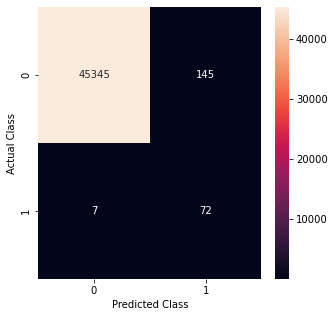

In [72]:
print('Accuracy MLP: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Loss value: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[0]))
Y_mod2_pred = Model2.predict(Xtest_arr,batch_size=200, verbose=0)
#Y_mod2_pred = Model2.predict_classes(Xtest_arr, batch_size=200, verbose=0)
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_mod2_pred > 0.5)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_mod2_pred > 0.5)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_mod2_pred > 0.5)))
conf_matrix(Y_mod2_pred > 0.5)

First, let's compare the ROC and PR curves before iterating the model.

1425/1425 [==============================] - 2s 1ms/step


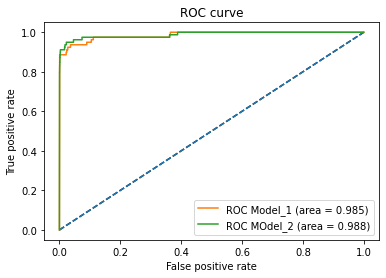

In [74]:
Y_pred_prob2 = Model2.predict(Xtest_arr).ravel()

fpr_model2, tpr_model2, thresholds_model2 = roc_curve(Ytest_arr, Y_pred_prob2, pos_label=1)
auc_model2 = roc_auc_score(Ytest_arr, Y_pred_prob2)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC Model_1 (area = {:.3f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='ROC MOdel_2 (area = {:.3f})'.format(auc_model2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

As observed, ROC curve is of no use. It does not provide any useful information. Thus, consider a P-R curve

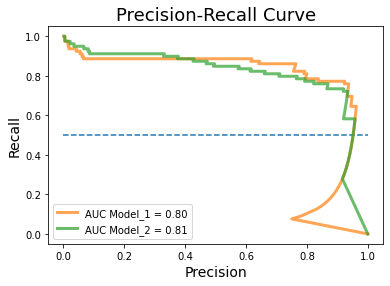

In [75]:
#Calculating Precision and Recall for various thresholds
precision_2, recall_2, thresholds_pr_2 = precision_recall_curve(Ytest_arr, Y_pred_prob2)

#Auc for PR curve
AUC_PRcurve_2= auc(recall_2, precision_2)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC Model_1 = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.plot(precision_2, recall_2, label = "AUC Model_2 = {:0.2f}".format(AUC_PRcurve_2), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [80]:
#Iterating Model-2 with 2 hidden layer for 60 iterations.

f_scorelist2=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):
    
    Second_Model = Sequential()
    Second_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    Second_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    Second_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_second_pred = Second_Model.predict(Xtest_arr, batch_size=200, verbose=0)
    
    f_score= f1_score(Ytest_arr,Y_second_pred > 0.0)
    f_scorelist2.append(f_score)

print(f_scorelist2)
print('FScore Mean: '+ str(np.mean(f_scorelist2)))
print('-'*88)

[0.0035422037888129133, 0.0036340218041308247, 0.0036231884057971015, 0.003520499108734403, 0.0035624901355099095, 0.0038455921725161855, 0.003754128353173189, 0.0037291415893695857, 0.0035239539655633864, 0.0035680411905514653, 0.003604014598540146, 0.003567557803468208, 0.0035690083578043823, 0.003566108427752449, 0.0035293066476054322, 0.003535229230528271, 0.0036345233713654767, 0.0036338546458141675, 0.0035281245115333943, 0.003708049753578972, 0.003720711173907924, 0.00390547755586316, 0.003641979577253763, 0.0035317522408744436, 0.003503869780231965, 0.0035670745473427553, 0.0035457809694793537, 0.0035575970458434658, 0.00364980364980365, 0.0036385408990420045, 0.0037340769976130267, 0.0037439871093102057, 0.0035432364549695017, 0.0035894406833568084, 0.0035230110595790226, 0.0035057356497814464, 0.0035090057076864987, 0.0036259323006310957, 0.0036373682029559374, 0.0035575169432373404, 0.0035963854050485963, 0.00356433856704566, 0.0038773957643132343, 0.003511579321687336, 0.00

In [ ]:
#RESULTS ANALYSIS

* If the Null Hypothesis is accepted, this means there is no difference between the datasets and the change of number of hidden layers does not affect the performance of the model.
*  If the Null Hypothesis is rejected, this means there is significant difference between the datasets and the change of number of hidden layers affects the performance of the model.

In [81]:
#Comparing the mean performance of the F-score for both the models
print('Model-1')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist1)))

print('-'*40)

print('Model-2')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist2)))

Model-1
---------
Average F-Score: 0.5371981305717282
----------------------------------------
Model-2
---------
Average F-Score: 0.0035998487223282633


In [82]:
#Comparing the Standard Deviation for F-scores generated after iterations
fscore_df1=pd.DataFrame(f_scorelist1)

print('Model-1')
print('------------------')
print('F_score SD: ' + str(fscore_df1.std()))

print('-'*40)

fscore_df2=pd.DataFrame(f_scorelist2)

print('Model-2')
print('------------------')
print('F_score SD: ' + str(fscore_df2.std()))

Model-1
------------------
F_score SD: 0    0.051604
dtype: float64
----------------------------------------
Model-2
------------------
F_score SD: 0    0.000092
dtype: float64


<AxesSubplot:>

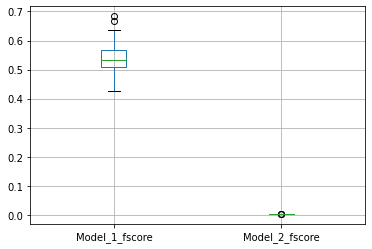

In [83]:
#Visualize the results using a boxplot()

results_fscore= pd.concat([fscore_df1, fscore_df2], axis=1)
results_fscore.columns = ['Model_1_fscore', 'Model_2_fscore']

results_fscore.boxplot()

array([[<AxesSubplot:title={'center':'Model_1_fscore'}>,
        <AxesSubplot:title={'center':'Model_2_fscore'}>]], dtype=object)

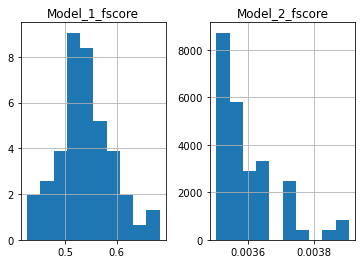

In [85]:
#Distribution of the data using a Histogram
results_fscore.hist(density=True)

In [86]:
#Testing the Null Hypothesis that a sample comes from a Normal Distribution
alpha = 0.05;

s, p = stats.normaltest(fscore_df1)
if p < alpha:
  print('Model-1 Data is not normal')
else:
  print('Model-1 Data is normal')

s, p = stats.normaltest(fscore_df2)
if p < alpha:
  print('Model-2 Data is not normal')
else:
  print('Model-2 Data is normal')

Model-1 Data is normal
Model-2 Data is not normal


In [87]:
#Wilcoxon Signed-Rank Test
#It tests the null hypothesis that two related paired samples come from the same distribution.
#It is a non-parametric version of the paired T-test.

s, p = stats.wilcoxon(fscore_df1[0], fscore_df2[0])

if p < 0.05:
  print('null hypothesis rejected, significant difference between the data-sets')
else:
  print('null hypothesis accepted, no significant difference between the data-sets')

null hypothesis rejected, significant difference between the data-sets
